In [7]:
import pandas as pd

# Load data
df = pd.read_csv("used_cars_data.csv")

# 1. Drop unwanted columns
df = df.drop(columns=["S.No.", "New_Price"], errors="ignore")

# 2. Drop duplicates
df = df.drop_duplicates()

# 3. Clean text columns and convert to numeric
for col, unit in [("Mileage", [" kmpl", " km/kg"]), ("Engine", [" CC"]), ("Power", [" bhp"])]:
    df[col] = df[col].astype(str)
    for u in unit:
        df[col] = df[col].str.replace(u, "", regex=False)
    df[col] = pd.to_numeric(df[col], errors="coerce")

# 4. Drop rows with missing critical values
df = df.dropna(subset=["Mileage", "Engine", "Power", "Price"])

# 5. Remove outliers using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

for col in ["Kilometers_Driven", "Mileage", "Engine", "Power", "Price"]:
    df = remove_outliers_iqr(df, col)

# 6. Save cleaned dataset
df.to_csv("cleaned_used_cars.csv", index=False)
print(" Cleaned dataset saved as cleaned_used_cars.csv")


 Cleaned dataset saved as cleaned_used_cars.csv


In [8]:
df = pd.read_csv('cleaned_used_cars.csv')
df.shape

(4781, 12)

In [9]:
df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

In [10]:
import pandas as pd

# Load data
df = pd.read_csv("used_cars_data.csv")

# 1. Drop unwanted columns
df = df.drop(columns=["S.No.", "Owner_Type","Seats"], errors="ignore")

# 2. Drop duplicates
df = df.drop_duplicates()

# 3. Clean text columns and convert to numeric
for col, unit in [("Mileage", [" kmpl", " km/kg"]), ("Engine", [" CC"]), ("Power", [" bhp"])]:
    df[col] = df[col].astype(str)
    for u in unit:
        df[col] = df[col].str.replace(u, "", regex=False)
    df[col] = pd.to_numeric(df[col], errors="coerce")

# 4. Drop rows with missing critical values
df = df.dropna(subset=["Mileage", "Engine", "Power", "Price","New_Price"])

# 5. Remove outliers using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

for col in ["Kilometers_Driven", "Mileage", "Engine", "Power", "Price"]:
    df = remove_outliers_iqr(df, col)

# 6. Save cleaned dataset
df.to_csv("cleaned_used_cars.csv", index=False)
print("Cleaned dataset saved as cleaned_used_cars.csv")


Cleaned dataset saved as cleaned_used_cars.csv


In [11]:
pd.read_csv('cleaned_used_cars.csv').isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Mileage              0
Engine               0
Power                0
New_Price            0
Price                0
dtype: int64

In [ ]:
## EDA

In [12]:
# Load and inspect data
import pandas as pd

df = pd.read_csv("cleaned_used_cars.csv")

# Overview
print(df.shape)
print(df.info())
print(df.describe())

# Check few rows
print(df.head())


(719, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               719 non-null    object 
 1   Location           719 non-null    object 
 2   Year               719 non-null    int64  
 3   Kilometers_Driven  719 non-null    int64  
 4   Fuel_Type          719 non-null    object 
 5   Transmission       719 non-null    object 
 6   Mileage            719 non-null    float64
 7   Engine             719 non-null    float64
 8   Power              719 non-null    float64
 9   New_Price          719 non-null    object 
 10  Price              719 non-null    float64
dtypes: float64(4), int64(2), object(5)
memory usage: 61.9+ KB
None
              Year  Kilometers_Driven     Mileage       Engine       Power  \
count   719.000000         719.000000  719.000000   719.000000  719.000000   
mean   2015.938804       37703.641168

In [13]:
# Basic Data Exploration
#--------------------------
# Unique values per categorical column
for col in ['Location', 'Fuel_Type', 'Transmission']:
    print(f"\n{col} value counts:")
    print(df[col].value_counts())

# Price distribution summary
print("\nPrice range:", df['Price'].min(), "to", df['Price'].max())



Location value counts:
Location
Kochi         124
Mumbai        122
Coimbatore    118
Hyderabad      64
Kolkata        53
Pune           52
Delhi          44
Chennai        41
Jaipur         40
Ahmedabad      35
Bangalore      26
Name: count, dtype: int64

Fuel_Type value counts:
Fuel_Type
Diesel    364
Petrol    354
CNG         1
Name: count, dtype: int64

Transmission value counts:
Transmission
Manual       477
Automatic    242
Name: count, dtype: int64

Price range: 1.75 to 35.67


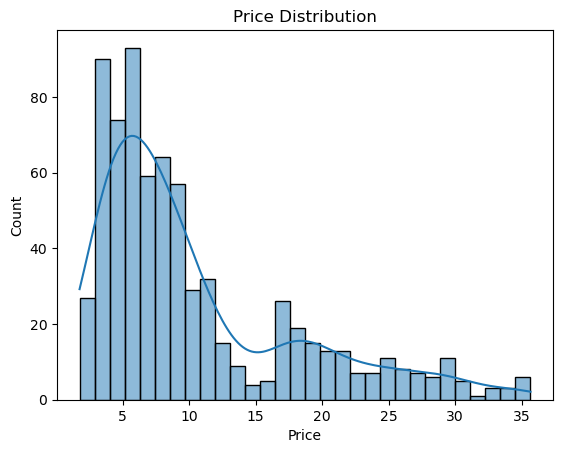

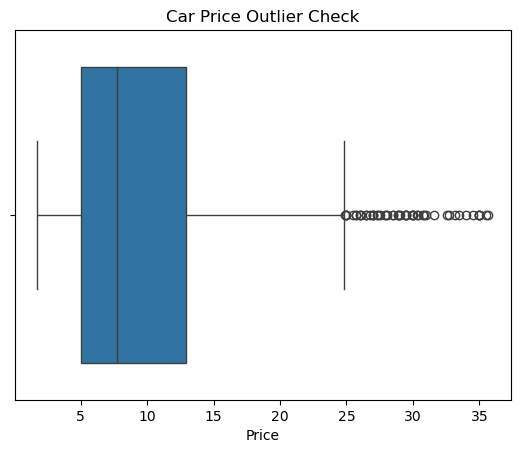

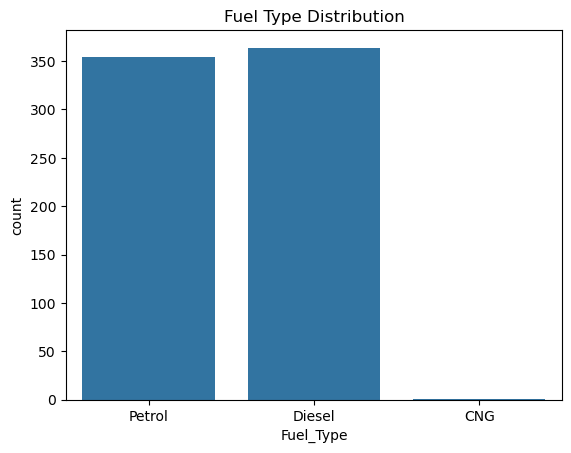

In [14]:
# Univariate Analysis (Individual Feature Distributions)
# -------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for Price
sns.histplot(df['Price'], kde=True, bins=30)
plt.title("Price Distribution")
plt.show()

# Boxplot for Price
sns.boxplot(x=df['Price'])
plt.title("Car Price Outlier Check")
plt.show()

# Countplot for Fuel Type
sns.countplot(x='Fuel_Type', data=df)
plt.title("Fuel Type Distribution")
plt.show()


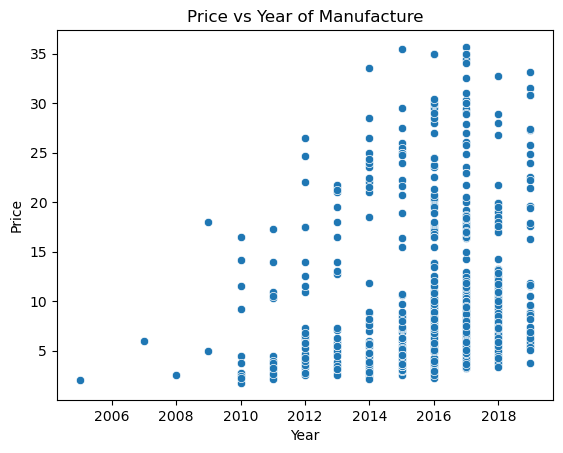

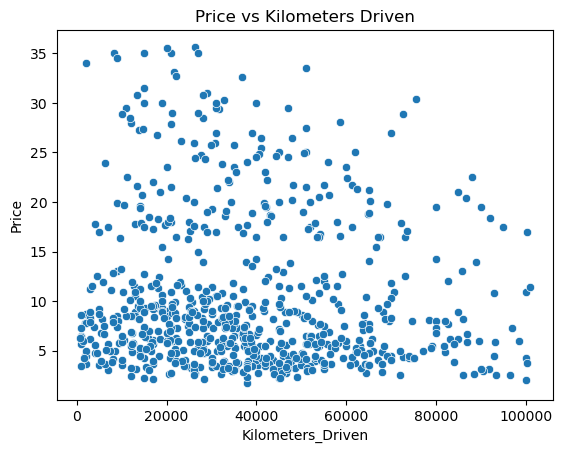

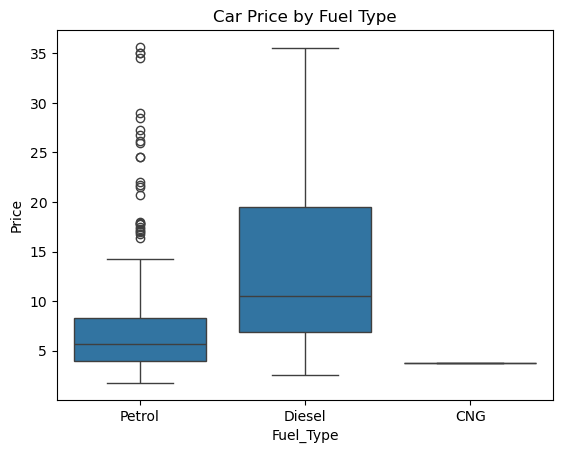

In [18]:
# Bivariate Analysis (Relationships Between Two Variables)
# Price vs Year
sns.scatterplot(x='Year', y='Price', data=df)
plt.title("Price vs Year of Manufacture")
plt.show()

# Price vs Kilometers Driven
sns.scatterplot(x='Kilometers_Driven', y='Price', data=df)
plt.title("Price vs Kilometers Driven")
plt.show()

# Boxplot: Price by Fuel Type
sns.boxplot(x='Fuel_Type', y='Price', data=df)
plt.title("Car Price by Fuel Type")
plt.show()

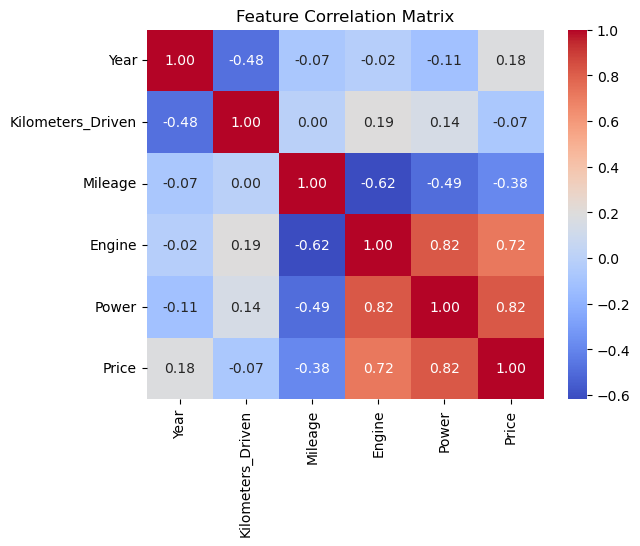

In [15]:
# Correlation Analysis
# Compute correlation matrix
corr = df[['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power','Price']].corr()

# Heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


In [16]:
# ==============================
#  EDA for Cleaned Used Cars Dataset
# ==============================

# 1️ Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create folder for saving plots
os.makedirs("eda_plots", exist_ok=True)

# 2️ Load Data
df = pd.read_csv("cleaned_used_cars.csv")

print(" Data Loaded Successfully")
print("Shape:", df.shape)
print(df.info())

# 3️ Basic Stats
print("\n Basic Statistics:")
print(df.describe(include='all').T)

# 4️ Missing Values
print("\n Missing Value Summary:")
print(df.isnull().sum())

# 5️ Distribution of Key Categorical Columns
categorical_cols = ['Location', 'Fuel_Type', 'Transmission']

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df, palette='viridis')
    plt.title(f"{col} Distribution")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.savefig(f"eda_plots/{col}_distribution.png")
    plt.close()

# 6️ Price Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], bins=30, kde=True, color='teal')
plt.title("Price Distribution")
plt.xlabel("Price (Lakh)")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("eda_plots/price_distribution.png")
plt.close()

# 7️ Boxplot to Check Outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Price'], color='salmon')
plt.title("Car Price Outlier Detection")
plt.tight_layout()
plt.savefig("eda_plots/price_boxplot.png")
plt.close()

# 8️ Relationship Analysis (Bivariate)
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Year', y='Price', data=df)
plt.title("Price vs Year of Manufacture")
plt.tight_layout()
plt.savefig("eda_plots/price_vs_year.png")
plt.close()

plt.figure(figsize=(8, 5))
sns.scatterplot(x='Kilometers_Driven', y='Price', data=df)
plt.title("Price vs Kilometers Driven")
plt.tight_layout()
plt.savefig("eda_plots/price_vs_km.png")
plt.close()

plt.figure(figsize=(8, 5))
sns.boxplot(x='Fuel_Type', y='Price', data=df)
plt.title("Price by Fuel Type")
plt.tight_layout()
plt.savefig("eda_plots/price_by_fuel.png")
plt.close()

# 9️ Correlation Analysis
corr = df[['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power','Price']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.savefig("eda_plots/correlation_matrix.png")
plt.close()

# 10 Insights Summary
print("\n EDA Completed! All plots saved inside the 'eda_plots/' folder.")
print("""
 Quick Insights:
- Newer cars generally have higher prices.
- More powerful engines (higher BHP) tend to increase price.
- Cars with higher mileage (kmpl) often have smaller engines.
- Automatic cars and diesel variants usually cost more.
""")


 Data Loaded Successfully
Shape: (719, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               719 non-null    object 
 1   Location           719 non-null    object 
 2   Year               719 non-null    int64  
 3   Kilometers_Driven  719 non-null    int64  
 4   Fuel_Type          719 non-null    object 
 5   Transmission       719 non-null    object 
 6   Mileage            719 non-null    float64
 7   Engine             719 non-null    float64
 8   Power              719 non-null    float64
 9   New_Price          719 non-null    object 
 10  Price              719 non-null    float64
dtypes: float64(4), int64(2), object(5)
memory usage: 61.9+ KB
None

 Basic Statistics:
                   count unique                  top freq          mean  \
Name                 719    282  Maruti Alto K10 VXI   16        

C:\Users\karth\AppData\Local\Temp\ipykernel_54960\153112000.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')
C:\Users\karth\AppData\Local\Temp\ipykernel_54960\153112000.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')
C:\Users\karth\AppData\Local\Temp\ipykernel_54960\153112000.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')



 EDA Completed! All plots saved inside the 'eda_plots/' folder.

 Quick Insights:
- Newer cars generally have higher prices.
- More powerful engines (higher BHP) tend to increase price.
- Cars with higher mileage (kmpl) often have smaller engines.
- Automatic cars and diesel variants usually cost more.



In [ ]:
#### EDA is done #######

In [ ]:
## ML 
Predict the Price of a used car based on its features such as:
Year
Kilometers_Driven
Mileage
Engine
Power
Seats
Fuel_Type, Transmission, Owner_Type, Location

Apply -> ML Pipeline — RandomForest Regressor

What This Does
================
Splits the data into train/test sets.
Encodes categorical columns (like fuel type, transmission).
Trains a Random Forest Regressor to predict Price.
Evaluates accuracy using R² score and MAE.
Prints a sample prediction.

In [17]:
# ==============================
#  Car Price Prediction Model
# ==============================

# 1️ Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# 2️ Load Data
df = pd.read_csv("cleaned_used_cars.csv")
print(" Data loaded:", df.shape)

# 3️ Define Features (X) and Target (y)
X = df.drop(columns=['Price'])
y = df['Price']

# 4️ Split Data into Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5️ Identify Column Types
numeric_features = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power']
categorical_features = ['Location', 'Fuel_Type', 'Transmission']

# 6️ Preprocessing
numeric_transformer = 'passthrough'
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# 7️ Build Pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# 8️ Train Model
model.fit(X_train, y_train)

# 9️ Evaluate Model
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f" R² Score: {r2:.3f}")
#print(f" Mean Absolute Error: {mae:.3f}")

# 10 Example Prediction
sample = X_test.iloc[0:1]
predicted_price = model.predict(sample)[0]
print("\n Sample Car:")
print(sample)
print(f"\n Predicted Price: {predicted_price:.2f} Lakh")


 Data loaded: (719, 11)
 R² Score: 0.883

 Sample Car:
                         Name Location  Year  Kilometers_Driven Fuel_Type  \
120  Maruti Vitara Brezza VDi  Kolkata  2017              35000    Diesel   

    Transmission  Mileage  Engine  Power  New_Price  
120       Manual     24.3  1248.0   88.5  9.46 Lakh  

 Predicted Price: 7.96 Lakh


 Data loaded: (719, 11)

 R² Score: 0.884
 Mean Absolute Error: 1.583 Lakh


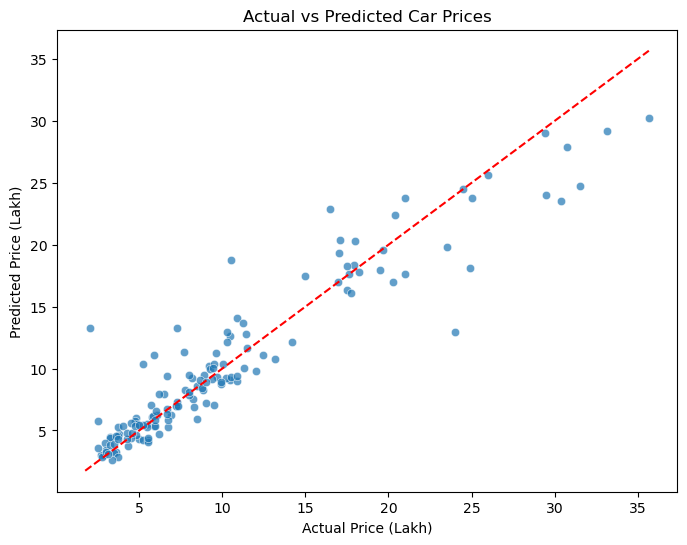

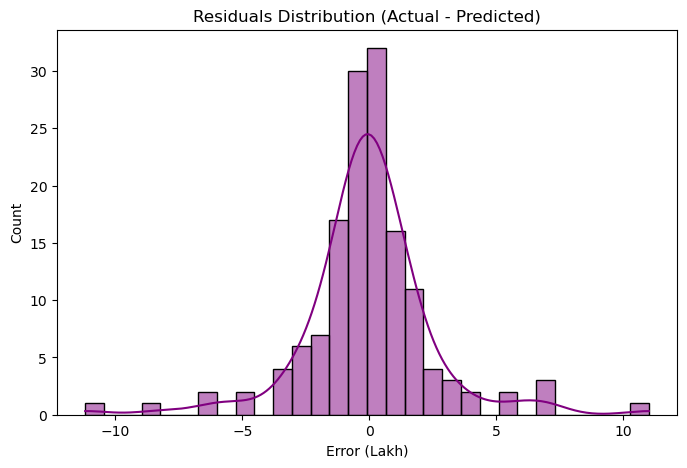

C:\Users\karth\AppData\Local\Temp\ipykernel_54960\3389487732.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp, palette='viridis')


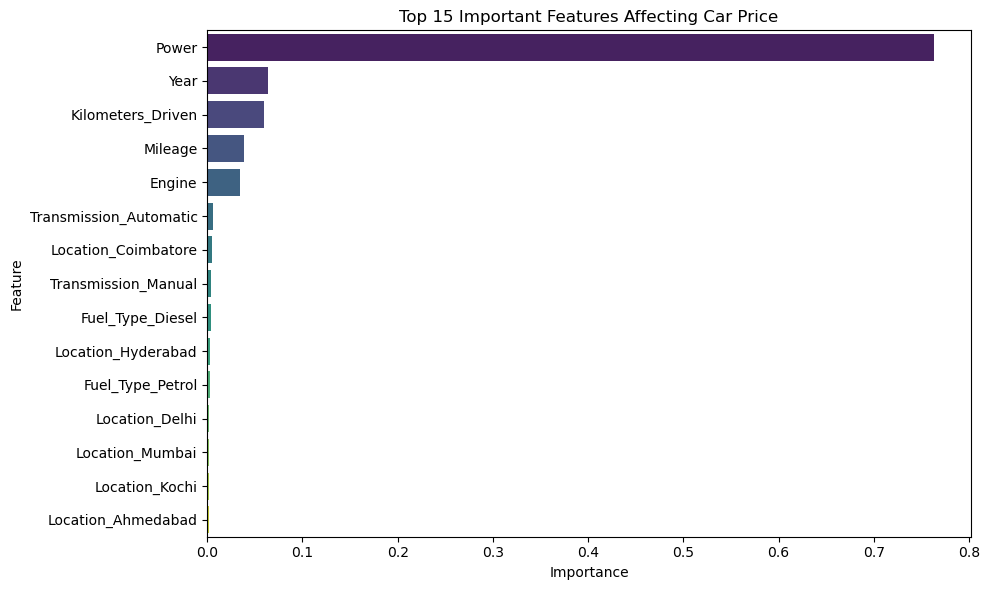


 Visualization completed successfully!


In [18]:
# -------------------------------------------
# Car Price Prediction with Visualization
# -------------------------------------------
# ==============================
#  Car Price Prediction + Visualization
# ==============================

# 1️ Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# 2️ Load Data
df = pd.read_csv("cleaned_used_cars.csv")
print(" Data loaded:", df.shape)

# 3️ Define Features (X) and Target (y)
X = df.drop(columns=['Price'])
y = df['Price']

# 4️ Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5️ Identify Columns
numeric_features = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power']
categorical_features = ['Location', 'Fuel_Type', 'Transmission']

# 6️ Preprocessor
numeric_transformer = 'passthrough'
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# 7️ Build & Train Model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=120, random_state=42))
])

model.fit(X_train, y_train)

# 8️ Predict
y_pred = model.predict(X_test)

# 9️ Evaluation
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"\n R² Score: {r2:.3f}")
print(f" Mean Absolute Error: {mae:.3f} Lakh")

# 10 Visualization Section

# --- 1. Actual vs Predicted Prices ---
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Price (Lakh)")
plt.ylabel("Predicted Price (Lakh)")
plt.title("Actual vs Predicted Car Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

# --- 2. Residual Plot ---
residuals = y_test - y_pred
plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True, color='purple')
plt.title("Residuals Distribution (Actual - Predicted)")
plt.xlabel("Error (Lakh)")
plt.show()

# --- 3. Feature Importance ---
# Extract feature names after one-hot encoding
ohe = model.named_steps['preprocessor'].named_transformers_['cat']
encoded_cat_features = ohe.get_feature_names_out(categorical_features)
all_features = numeric_features + list(encoded_cat_features)

# Get feature importances from the trained RandomForest
importances = model.named_steps['regressor'].feature_importances_

# Create DataFrame for visualization
feat_imp = pd.DataFrame({'Feature': all_features, 'Importance': importances})
feat_imp = feat_imp.sort_values('Importance', ascending=False).head(15)

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp, palette='viridis')
plt.title("Top 15 Important Features Affecting Car Price")
plt.tight_layout()
plt.show()

print("\n Visualization completed successfully!")


In [ ]:
## using streamlit 
# ========================================
#  Used Car Price Prediction (Streamlit)
# ========================================

import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# -------------------------------
#  Streamlit UI Configuration
# -------------------------------
st.set_page_config(page_title="Car Price Prediction", layout="wide")
st.title(" Used Car Price Prediction App")
st.markdown("### Predict car resale prices using Machine Learning (Random Forest)")

# -------------------------------
#  Upload CSV
# -------------------------------
uploaded_file = st.file_uploader("Upload Cleaned Used Cars CSV", type=["csv"])

if uploaded_file is not None:
    df = pd.read_csv(uploaded_file)
    st.success(" Data loaded successfully!")
    st.write("### Dataset Preview")
    st.dataframe(df.head())

    # -------------------------------
    #  Define Features & Target
    # -------------------------------
    X = df.drop(columns=['Price'])
    y = df['Price']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Identify column types
    numeric_features = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power']
    categorical_features = ['Location', 'Fuel_Type', 'Transmission']

    # Preprocessing
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', 'passthrough', numeric_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ]
    )

    # Build model
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
    ])

    # Train
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # -------------------------------
    #  Model Evaluation
    # -------------------------------
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    st.write("###  Model Evaluation Metrics")
    st.metric("R² Score", f"{r2:.3f}")
    st.metric("Mean Absolute Error (Lakh ₹)", f"{mae:.3f}")

    # -------------------------------
    #  Visualization
    # -------------------------------
    st.write("###  Actual vs Predicted Prices")
    fig1, ax1 = plt.subplots(figsize=(7, 5))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, ax=ax1)
    ax1.set_xlabel("Actual Price (Lakh)")
    ax1.set_ylabel("Predicted Price (Lakh)")
    ax1.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
    st.pyplot(fig1)

    # Residuals
    residuals = y_test - y_pred
    st.write("###  Residual Distribution")
    fig2, ax2 = plt.subplots(figsize=(7, 4))
    sns.histplot(residuals, kde=True, color='purple', ax=ax2)
    ax2.set_title("Residuals (Actual - Predicted)")
    st.pyplot(fig2)

    # Feature Importance
    st.write("###  Feature Importance")
    ohe = model.named_steps['preprocessor'].named_transformers_['cat']
    encoded_cat_features = ohe.get_feature_names_out(categorical_features)
    all_features = numeric_features + list(encoded_cat_features)
    importances = model.named_steps['regressor'].feature_importances_
    feat_imp = pd.DataFrame({'Feature': all_features, 'Importance': importances})
    feat_imp = feat_imp.sort_values('Importance', ascending=False).head(15)

    fig3, ax3 = plt.subplots(figsize=(9, 5))
    sns.barplot(x='Importance', y='Feature', data=feat_imp, palette='viridis', ax=ax3)
    ax3.set_title("Top 15 Important Features Affecting Price")
    st.pyplot(fig3)

    # -------------------------------
    #  Prediction Form
    # -------------------------------
    st.write("###  Predict Price for a New Car")

    col1, col2, col3 = st.columns(3)
    with col1:
        location = st.selectbox("Location", df['Location'].unique())
        fuel = st.selectbox("Fuel Type", df['Fuel_Type'].unique())
        transmission = st.selectbox("Transmission", df['Transmission'].unique())

    with col2:
        year = st.number_input("Year", min_value=2000, max_value=2025, value=2015)
        km = st.number_input("Kilometers Driven", min_value=0, value=50000)
        mileage = st.number_input("Mileage (km/l)", min_value=5.0, value=18.0)

    with col3:
        engine = st.number_input("Engine (CC)", min_value=800, value=1200)
        power = st.number_input("Power (bhp)", min_value=30.0, value=80.0)

    if st.button(" Predict Price"):
        new_data = pd.DataFrame({
            'Year': [year],
            'Kilometers_Driven': [km],
            'Mileage': [mileage],
            'Engine': [engine],
            'Power': [power],
            'Location': [location],
            'Fuel_Type': [fuel],
            'Transmission': [transmission]
        })

        predicted_price = model.predict(new_data)[0]
        st.success(f" **Predicted Price: ₹ {predicted_price:.2f} Lakh**")

else:
    st.info(" Please upload a cleaned CSV file to begin.")


In [ ]:
! streamlit run mlapp_cleaned_cars.py

In [ ]:
# Gen AI

In [ ]:
import os
import pandas as pd
from langchain_community.llms import Ollama
from langchain_community.embeddings import OllamaEmbeddings
from langchain_community.vectorstores import Chroma
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.chains import RetrievalQA
from langchain.docstore.document import Document
import warnings
warnings.filterwarnings('ignore')

class CSVRAGSystem:
    def __init__(self, csv_path, model_name="llama2"):
        """
        Initialize RAG system with CSV file
        
        Args:
            csv_path: Path to your CSV file
            model_name: Ollama model name (default: llama2)
        """
        self.csv_path = csv_path
        self.model_name = model_name
        self.llm = None
        self.embeddings = None
        self.vectorstore = None
        self.qa_chain = None
        
    def load_csv_data(self):
        """Load and process CSV data"""
        print(f"Loading CSV from: {self.csv_path}")
        df = pd.read_csv(self.csv_path)
        
        # Display CSV info
        print(f"\nCSV Shape: {df.shape}")
        print(f"Columns: {list(df.columns)}")
        print(f"\nFirst few rows:")
        print(df.head())
        
        return df
    
    def create_documents(self, df):
        """Convert CSV rows to documents"""
        documents = []
        
        for idx, row in df.iterrows():
            # Create text content from each row
            content = "\n".join([f"{col}: {row[col]}" for col in df.columns])
            
            # Create metadata
            metadata = {
                "row_index": idx,
                "source": self.csv_path
            }
            
            doc = Document(page_content=content, metadata=metadata)
            documents.append(doc)
        
        print(f"\nCreated {len(documents)} documents from CSV")
        return documents
    
    def setup_rag(self):
        """Setup RAG components"""
        print("\n=== Setting up RAG System ===")
        
        # Initialize Ollama LLM
        print(f"Initializing Ollama with model: {self.model_name}")
        self.llm = Ollama(model=self.model_name, temperature=0.1)
        
        # Initialize Ollama Embeddings
        print("Initializing embeddings...")
        self.embeddings = OllamaEmbeddings(model=self.model_name)
        
        # Load and process CSV
        df = self.load_csv_data()
        documents = self.create_documents(df)
        
        # Split documents if they're too large
        text_splitter = RecursiveCharacterTextSplitter(
            chunk_size=500,
            chunk_overlap=50
        )
        split_docs = text_splitter.split_documents(documents)
        print(f"Split into {len(split_docs)} chunks")
        
        # Create vector store
        print("Creating vector store...")
        self.vectorstore = Chroma.from_documents(
            documents=split_docs,
            embedding=self.embeddings,
            persist_directory="./chroma_db"
        )
        
        # Create QA chain
        print("Creating QA chain...")
        self.qa_chain = RetrievalQA.from_chain_type(
            llm=self.llm,
            chain_type="stuff",
            retriever=self.vectorstore.as_retriever(search_kwargs={"k": 3}),
            return_source_documents=True
        )
        
        print("\n RAG System ready!")
    
    def query(self, question):
        """Query the RAG system"""
        if self.qa_chain is None:
            raise Exception("RAG system not initialized. Call setup_rag() first.")
        
        print(f"\n Question: {question}")
        print("\n Searching and generating answer...\n")
        
        result = self.qa_chain({"query": question})
        
        answer = result['result']
        source_docs = result['source_documents']
        
        print(f" Answer: {answer}\n")
        print(f" Retrieved {len(source_docs)} relevant documents")
        
        return answer, source_docs
    
    def interactive_mode(self):
        """Run interactive query mode"""
        print("\n" + "="*60)
        print(" CSV RAG System - Interactive Mode")
        print("="*60)
        print("Type your questions (or 'quit' to exit)")
        print("="*60 + "\n")
        
        while True:
            question = input("Your question: ").strip()
            
            if question.lower() in ['quit', 'exit', 'q']:
                print("\n Goodbye!")
                break
            
            if not question:
                continue
            
            try:
                self.query(question)
            except Exception as e:
                print(f" Error: {str(e)}")


def main():
    """Main function to run the RAG system"""
    print("="*60)
    print(" CSV RAG Application with Ollama")
    print("="*60)
    
    # Get CSV file path
    csv_path = input("\nEnter the path to your CSV file: ").strip()
    
    if not os.path.exists(csv_path):
        print(f" File not found: {csv_path}")
        return
    
    # Get model name
    model_name = input("Enter Ollama model name (press Enter for 'llama2'): ").strip()
    if not model_name:
        model_name = "gemma2:2b"
    
    # Create and setup RAG system
    rag_system = CSVRAGSystem(csv_path, model_name)
    
    try:
        rag_system.setup_rag()
        
        # Run interactive mode
        rag_system.interactive_mode()
        
    except Exception as e:
        print(f"\n Error: {str(e)}")
        print("\nMake sure:")
        print("1. Ollama is installed and running")
        print("2. The model is pulled: ollama pull gemma:2b")
        print("3. Your CSV file is accessible")


if __name__ == "__main__":
    main()